# CEMENT SLUMP

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="Types_of_concrete_slump.jpg">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

### Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('cement_slump.csv')

### Data and Viz

In [5]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [7]:
df.corr()["Compressive Strength (28-day)(Mpa)"]

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<AxesSubplot:>

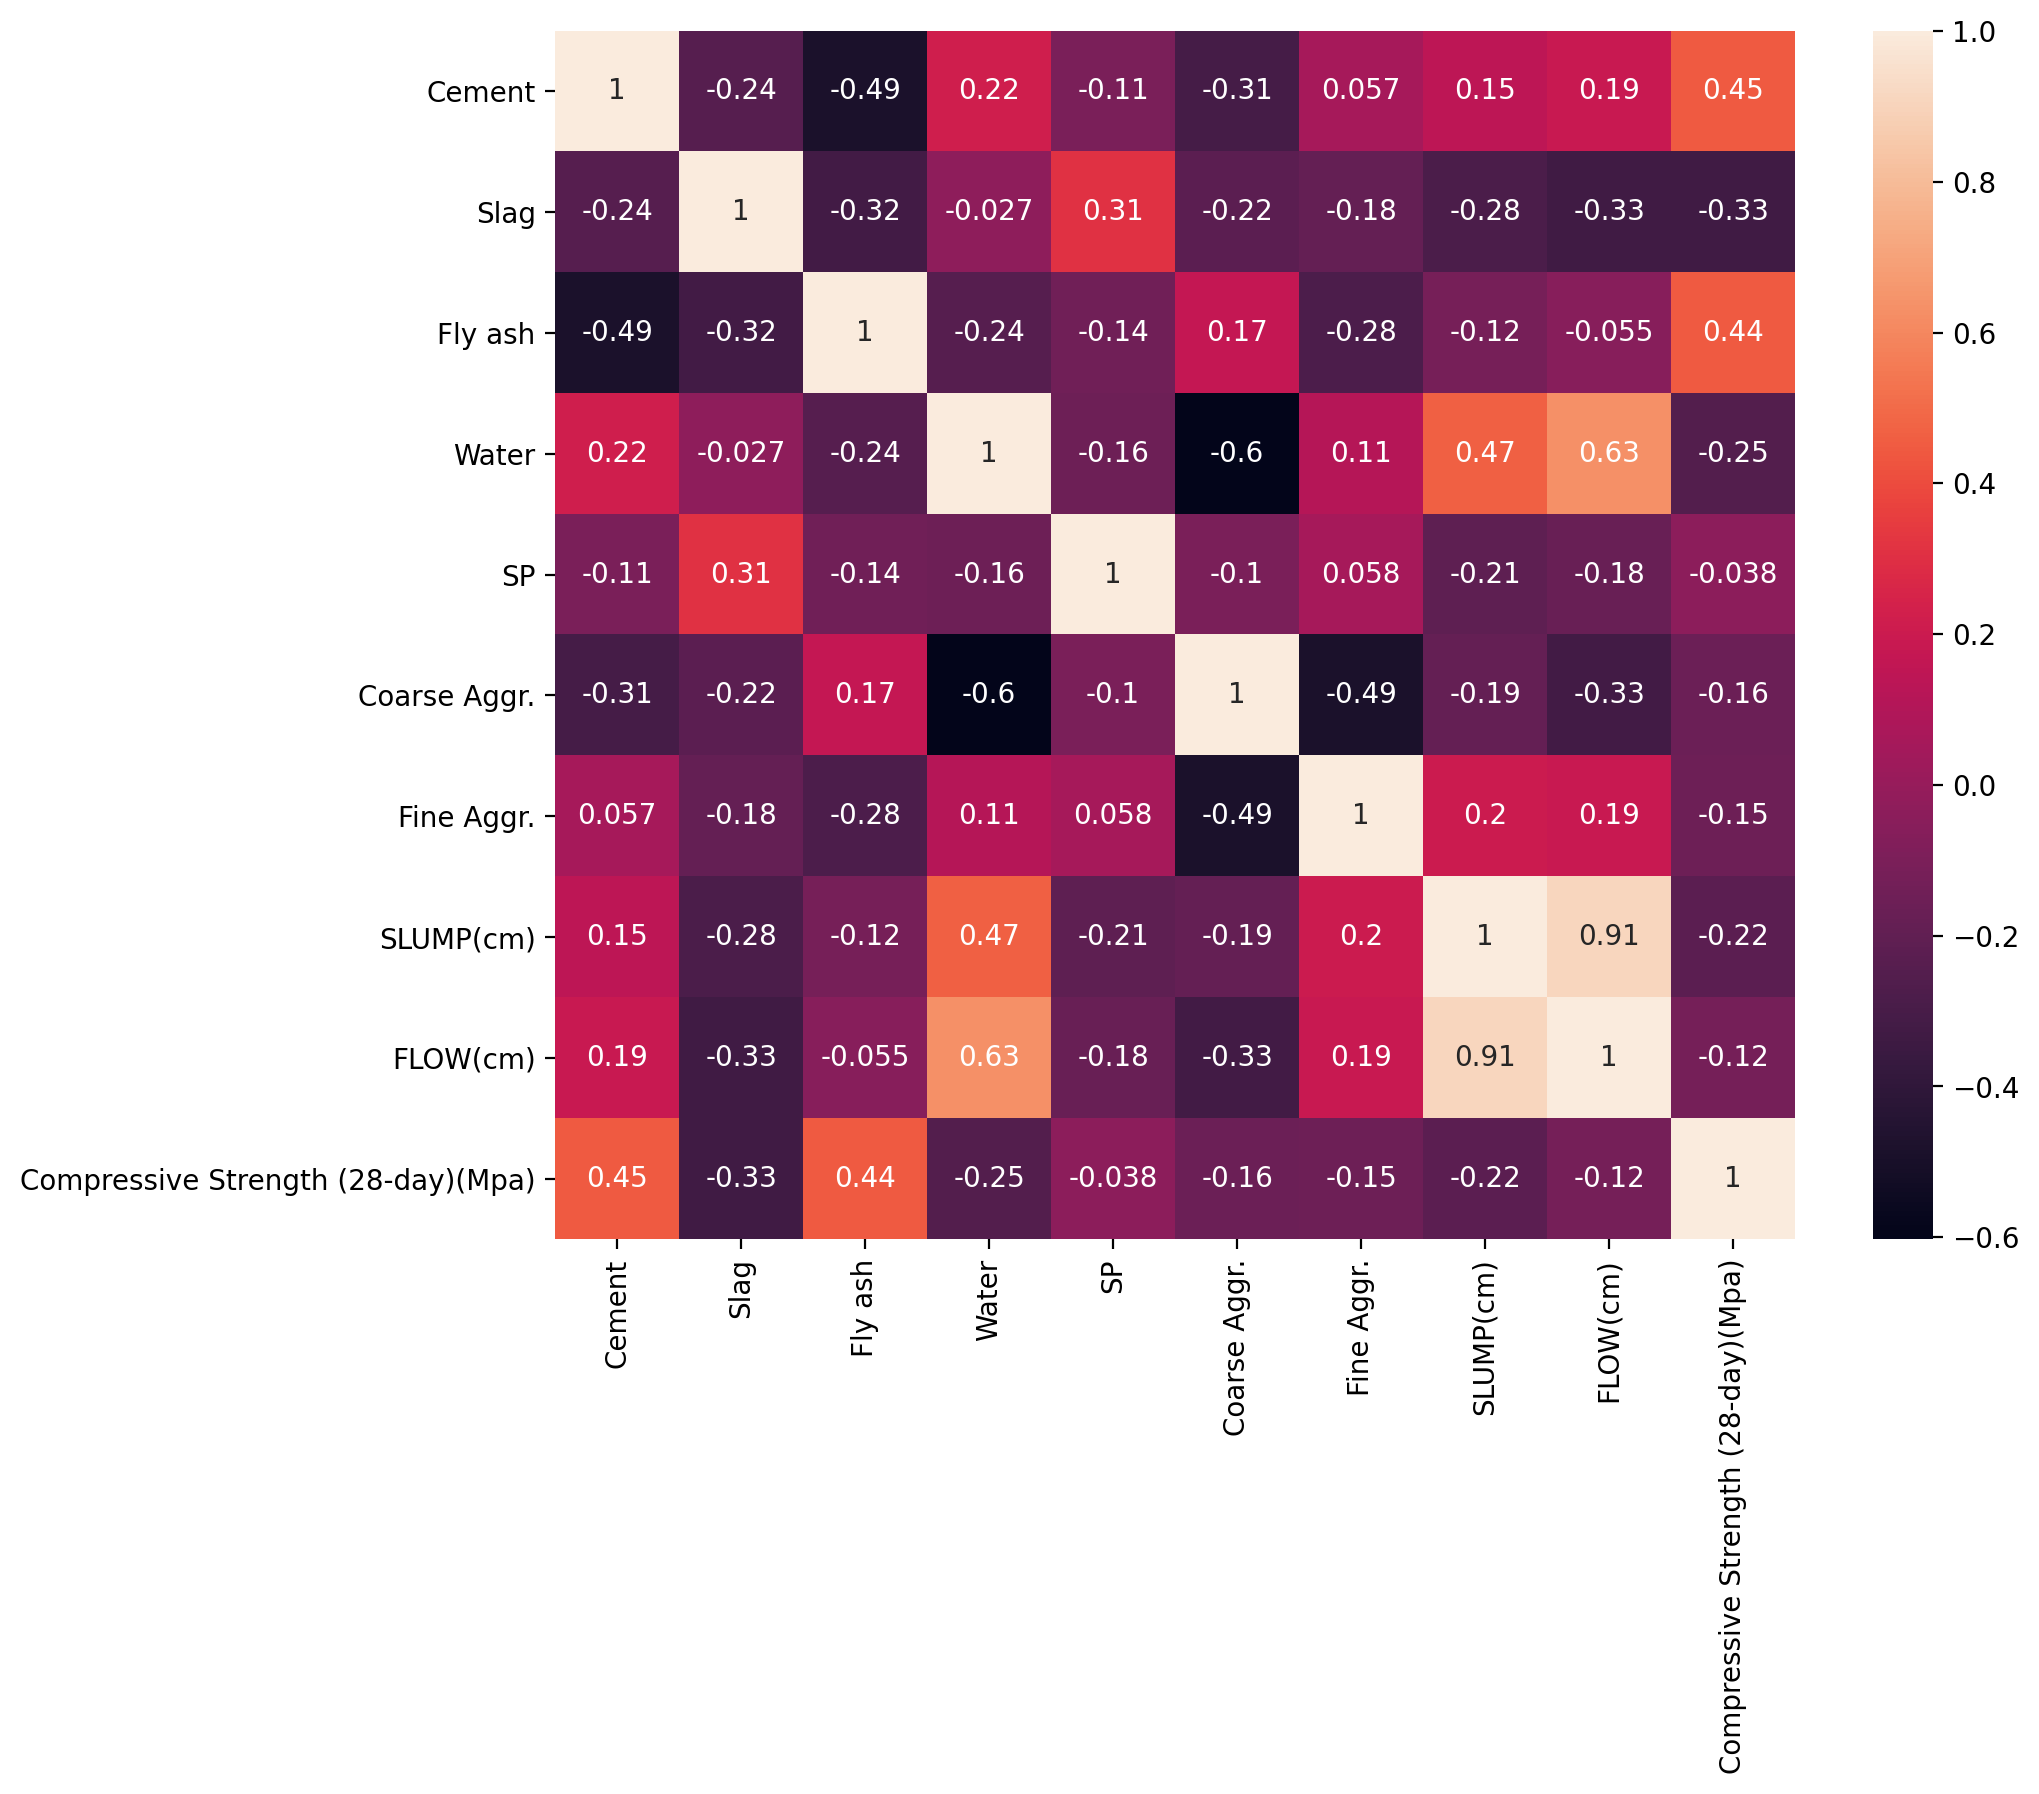

In [11]:
plt.figure(figsize=(10,8), dpi=200)
sns.heatmap(df.corr(), annot=True)

In [12]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

### Train Test Split & Scaler

In [14]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis = 1)
y = df['Compressive Strength (28-day)(Mpa)']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.3, random_state=101)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## SVR Model

In [21]:
from sklearn.svm import SVR, LinearSVR
# There are three different implementations of Support Vector
#... Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a
#... faster implementation than SVR but only considers the linear kernel, 
#... while NuSVR implements a slightly different formulation than SVR and LinearSVR.

In [23]:
base_model = SVR()

In [24]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [25]:
base_preds = base_model.predict(scaled_X_test)

### Evaluation

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
mean_absolute_error(y_test,base_preds)

5.236902091259179

In [28]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.695914838327133

In [29]:
y_test.mean()

36.26870967741935

### Better Grid Model

In [30]:
param_grid = {
    'C':[0.001,0.01,0.1,0.5,1],
    'kernel':['linear','rbf','poly'],
    'gamma':['scale','auto'],
    'degree':[2,3,4],
    'epsilon':[0,0.01,0.1,0.5,1,2]
}

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [33]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [34]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [35]:
grid_preds = grid.predict(scaled_X_test)

In [36]:
mean_absolute_error(y_test,grid_preds)

2.512801221076198

In [37]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.1782103051198347